KNN

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
colorMap = {
    1 : 'red',
    2 : 'blue',
    3 : 'green',
    4 : 'yellow',
    5 : 'orange',
    0 : 'black'
}

In [3]:
X, Y = make_blobs(n_samples = 2000, n_features = 10, centers = 5, cluster_std = 1.5, shuffle = True)

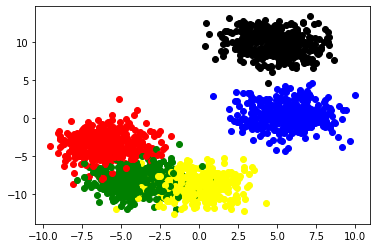

In [4]:
for idx,i in enumerate(X):
    plt.scatter(i[0],i[1],c=colorMap[Y[idx]])
plt.show()

In [5]:
def distance(x,y,p=2):
    """
    calculates Lp distance between point x and point y
    Args:
        x (np.ndarray): datapoint x
        y (np.ndarray): datapoint y
        p (int): order of Lp norm
    Returns:
        Distance between points based on the norm passed
    """
    
    tot_sum = 0
    for i in range(len(x)):
        diff = x[i] - y[i]
        diff = abs(diff)
        diff = pow(diff,p)
        tot_sum += diff

    tot_sum = pow(tot_sum,1/p)
    
    return tot_sum

In [6]:
def knnclassify(test_data, training_data, training_labels, K=1):
    """
    KNN classifier
    Args:
        test_data (numpy.ndarray): Test data points.
        training_data (numpy.ndarray): Training data points.
        training_labels (numpy.ndarray): Training labels.
        K (int): The number of neighbors.

    Returns:
        pred_labels: contains the predicted label for each test data point, have the same number of rows as 'test_data'
    """

    # use the existing distance function to compute distances.
    pred_labels = np.zeros(test_data.shape[0], dtype=int)
    
    for idxi, i in enumerate(test_data):
        # compute distance array for all train points
        distance_array = []
        
        for idxj,j in enumerate(training_data):
            distance_array.insert( 0, [distance(i, j, 2), training_labels[idxj]] )

        # sort the distance array
        distance_array.sort(key = lambda x:x[0])

        # get the first k values             
        distance_array = distance_array[:K]

        # get count of all values
        counts = {}

        for i in distance_array:
            if i[1] in counts:
                counts[i[1]] += 1
            else:
                counts[i[1]] = 1

        # get the label that has the max counts            
        max_key = max(counts, key = counts.get)
        pred_labels[idxi] = max_key
        
    # return the final array
    return pred_labels

In [7]:
k_mean_list = []
k_std_list = []
k_range_list = [l for l in range(1,15)]

output_matrix = np.zeros((len(k_range_list),100))

for k in k_range_list:
    print ('For k => ', k)
    for epoch in range(output_matrix.shape[1]):
        if epoch %10 == 0:
            print ('For epoch => ', epoch)
        (training_data, test_data, training_labels, test_labels) = train_test_split(X, Y, test_size=0.3)
        pred_labels = knnclassify(test_data, training_data, training_labels, K=k)
        accuracy = sum(test_labels == pred_labels)/len(test_labels)
        output_matrix[k-1][epoch] = accuracy
    k_mean_list.append(output_matrix[k-1].mean())
    k_std_list.append(output_matrix[k-1].std())

For k =>  1
For epoch =>  0
For epoch =>  10
For epoch =>  20
For epoch =>  30
For epoch =>  40
For epoch =>  50
For epoch =>  60
For epoch =>  70
For epoch =>  80
For epoch =>  90
For k =>  2
For epoch =>  0
For epoch =>  10
For epoch =>  20
For epoch =>  30
For epoch =>  40
For epoch =>  50
For epoch =>  60
For epoch =>  70
For epoch =>  80
For epoch =>  90
For k =>  3
For epoch =>  0
For epoch =>  10
For epoch =>  20
For epoch =>  30
For epoch =>  40
For epoch =>  50
For epoch =>  60
For epoch =>  70
For epoch =>  80
For epoch =>  90
For k =>  4
For epoch =>  0
For epoch =>  10
For epoch =>  20
For epoch =>  30
For epoch =>  40
For epoch =>  50
For epoch =>  60
For epoch =>  70
For epoch =>  80
For epoch =>  90
For k =>  5
For epoch =>  0
For epoch =>  10
For epoch =>  20
For epoch =>  30
For epoch =>  40
For epoch =>  50
For epoch =>  60
For epoch =>  70
For epoch =>  80
For epoch =>  90
For k =>  6
For epoch =>  0
For epoch =>  10
For epoch =>  20
For epoch =>  30
For epoch =>  40

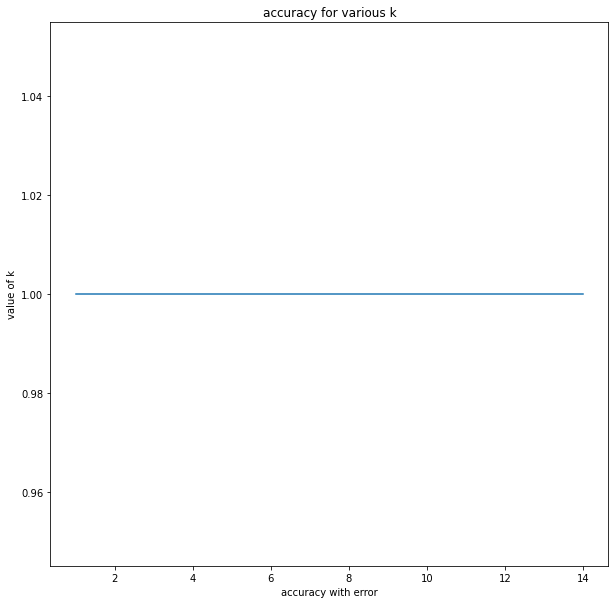

In [8]:
plt.figure(figsize = (10,10))
plt.title('accuracy for various k')
plt.ylabel('value of k')
plt.xlabel('accuracy with error')
plt.errorbar(k_range_list, k_mean_list, yerr = k_std_list, ecolor = 'red')
plt.show()